# Homework 4 Diffusion Models

Instructions: Click **Copy to drive** at the top and enter your solutions, the code has been tested on Colab.

Submission: please upload your completed solution **.ipynb file and printed PDF file** to [Gradescope](https://www.gradescope.com/courses/591156) (Entry code: GP5DK6) by **Nov 13, 10PM EST**.
_________

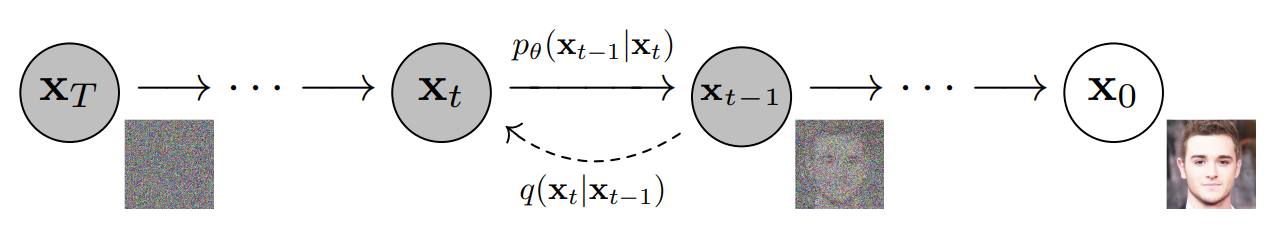

Illustration of the diffusion process. Figure from [1].

Material in this homework are adapted from [1] and [2] and [3].

[1] Jonathan Ho, Ajay Jain, and Pieter Abbeel. “Denoising diffusion probabilistic models”. _Advances in Neural Information Processing Systems_ 33 (2020), pp. 6840–6851.

[2] Jascha Sohl-Dickstein et al. “Deep unsupervised learning using nonequilibrium thermodynamics”. _International Conference on Machine Learning_. PMLR. 2015, pp. 2256–2265.

[3] Dhariwal, Prafulla, and Alexander Nichol. "Diffusion models beat gans on image synthesis." _Advances in Neural Information Processing Systems_ 34 (2021): 8780-8794.

## Introduction (Please read)
--------------------------

  A diffusion model is a type of latent variable generative model where the generative process is defined to be a Markov process. See figure. The generative process (from left to right) resembles a _gradual denoising_ process, where $x_T$ is random noise drawn from a Gaussian distribution, and $x_0$ is drawn from the data distribution.

$$p(x_T) = \mathcal{N}(x_T ; \mathbf{0}, \mathbf{I})$$

  The **forward process** is a Markov process $q$. This is _known/given_:

$$q(x_t | x_{t-1} ) = \mathcal{N} (x_t ; \sqrt{1 - \beta_t} x_{t-1} , \beta_t \mathbf{I}) $$

#### Some clarifications regarding notation:
* The $\mathcal{N}$ notation means that $x_t$ is normally distributed with mean $\sqrt{1 - \beta_t} x_{t-1}$ and covariance matrix $\beta_t \mathbf{I}$.

* $x_t$ are vectors.


Our goal is to learn the parameters $\theta$ of the **reverse process** $p_{\theta}$:

$$p_{\theta} (x_{t-1} | x_t )$$

Both the forward and reverse process are constrained to be _Markov chains_. They satisfy the _Markov property_. That is, the distribution of the current state only depends on the previous state and not all past states. Consequently, we can write the joint probability distribution over all forward process states as:

$$q(x_{1:T}|x_0) = q(x_1|x_0)q(x_2|x_1) \cdot ... \cdot q(x_T|x_{T-1})$$

We can write the joint probability distribution over all reverse process states as:

$$p_{\theta}(x_{0:T}) = p_{\theta}(x_T) p_{\theta}(x_{T-1}|x_T)  \cdot ... \cdot p_{\theta}(x_0|x_1) $$


The notation $x_{0:T}$ is short hand for the set of variables $\{ x_0, x_1, x_2, ... , x_T\}$.


As usual, we want to minimize the _negative log-likelihood_ of the observed data occurring under our model. Specifically, we want to find $\theta_{\star} = \arg \min_{\theta} \mathbb{E}_{x_0 \sim q} [- \log p_{\theta} (x_0)]$. We cannot generally minimize this negative likelihood directly, so we need to minimize an upper-bound.


## Problem 1 Diffusion Analysis (45 points)
------------
The goal of this problem is to analytically derive the loss function used to optimize the diffusion process. Specifically, we need to show that *what we end up optimizing is indeed an upper-bound on the negative log-likelihood.* The proof is long, so you are only asked to prove a selected number of intermediary results. There are four parts to this problem.

## Problem 1(a) (15 points)
---------------
Let

$$L := \mathbb{E}_{x_{0:T} \sim q} \left[- \log \frac{p_{\theta} (x_{0:T})}{q(x_{1:T} | x_0)}\right]$$

Show that  

$$\mathbb{E}_{x_0 \sim q} [- \log p_{\theta} (x_0)] \le L $$

This is a fairly direct application of the Evidence Lower Bound (ELBO) result; but write out the steps clearly, don't just refer to the ELBO proof.

### Solution


**`[double click here to add a solution]`**

## Problem 1(b) (15 points)
---------------

Next, we want to decompose $L$ into more manageable components so it is clear how to minimize $L$. Show that:

$$L = \mathbb{E}_{x_{0:T} \sim q} \left[- \log \frac{p (x_T) }{q(x_T | x_0) } - \sum_{t=2}^T \log \frac{p_{\theta} (x_{t-1} | x_t) }{q(x_{t-1} | x_t, x_0)} -\log p_{\theta} (x_0 | x_1) \right]$$

Hint: You will need to apply Bayes rule, Markov property and telescoping sum. **Clearly show where each property is used.**

### Solution


**`[double click here to add a solution]`**

Notice that the first term is constant w.r.t. $\theta$ and therefore not relevant to our optimization. The last term $p_{\theta} (x_0 | x_1)$ deals with the last denoising step in the reverse process. We will just ignore this term -- it is an artifact of the derivation and not interesting for implementation purposes. The new objective is:

$$\widetilde{L} = \mathbb{E}_{x_{0:T} \sim q} \left[ - \sum_{t=2}^T \log \frac{p_{\theta} (x_{t-1} | x_t)   } {q(x_{t-1} | x_t, x_0) } \right] $$

What we're left with is very intuitive. We want to train the reverse process $p_{\theta} (x_{t-1} | x_t)$ to look like the the reverse of the known forward process $q(x_{t-1} | x_t, x_0)$. We can make this interpretation clear by applying the definition of the KL divergence.

## Problem 1(c) (5 points)
---------------

Show that:

$$ \widetilde{L} = \sum_{t=2}^T \mathbb{E}_{x_0, x_t \sim q} \left[  D_{KL} ( q(x_{t-1} | x_t, x_0) \| p_{\theta} (x_{t-1} | x_t) )\right]$$

Use the following definition of the KL divergence. Here $p$ and $q$ denote probability density functions of two random variables:

$$D_{KL} (p(x) \| q(x)) = \mathbb{E}_{x \sim p(x)}\left[\log \frac{p(x)}{q(x)}\right]$$
  Note that, in the definition of $\widetilde{L}$, the expectation is only w.r.t. $x_0$ and $x_t$. The KL divergence inside the expectation compares the two distributions $q$ and $p_{\theta}$ w.r.t. the random variable $x_{t-1}$ given $x_0$ and $x_t$.
  
The solution to this problem is short.

### Solution

**`[double click here to add a solution]`**

We now want to minimize $ \widetilde{L} $ w.r.t. $\theta$. There are two remaining analytical tasks before implementing our diffusion model: (1) Obtain a closed form expression for $q(x_{t-1} | x_t, x_0)$ and (2) define $p_{\theta} (x_{t-1} | x_t)$.

Looking ahead, $q(x_{t-1} | x_t, x_0)$ is a Gaussian distribution (we haven't shown this yet). To see this, we need to first use Bayes rule to write:

$$ q(x_{t-1} | x_t, x_0) = q(x_t | x_{t-1}) \frac{q(x_{t-1} | x_0)}{q(x_t | x_0)}$$

$q(x_t | x_{t-1})$ is given by the definition of the forward process at the beginning of the assignment. It is Gaussian by definition. $q(x_t | x_0)$ for $t \in \{1 , ... ,  T\}$ is also a Gaussian, but we need to show this in the next part.

## Problem 1(d) (10 points)
---------------

You can assume the following properties of Gaussians without proof:

* The sum of two independent scalar Gaussian random variables is also a Gaussian random variable.

* A Gaussian random variable multiplied by a constant scalar is also a Gaussian random variable.

**Some intermediate notations:**

$$\alpha_t = 1 - \beta_t$$
$$\bar{\alpha_t} = \prod^t_{s=1} \alpha_s$$

Using the linearity of expectation and properties of variances, show that $q(x_t | x_0) = \mathcal{N} (x_t ; \sqrt{\bar{\alpha_t}} x_0 , 1- \bar{\alpha_t}  )$, for $t \in \{1 , ... ,  T\}$, given that $q(x_t | x_{t-1} ) = \mathcal{N} (x_t ; \sqrt{1 - \beta_t} x_{t-1} , \beta_t ) $. $\alpha_t = 1 - \beta_t$ and $\bar{\alpha_t} = \prod^t_{s=1} \alpha_s$. For this part only, you can assume $x_0$ and $x_t$ to be scalars.

### Solution

**`[double click here to add a solution]`**

Since we assume the covariance matrix is a diagonal matrix, the result trivially extends to the multivariate case.
We've shown that $q(x_t | x_0) = \mathcal{N} (x_t ; \sqrt{\bar{\alpha_t}} x_0 , (1- \bar{\alpha_t} ) \mathbf{I} )$, where $\alpha_t = 1 - \beta_t$ and $\bar{\alpha_t} = \prod^t_{s=1} \alpha_s$.

## Wrapping up the analysis (Please read)
---------------

Now we need the fact that $ q(x_{t-1} | x_t, x_0) $ is also Gaussian distributed:

$$ q(x_{t-1} | x_t, x_0) = \mathcal{N} (x_{t-1} ; \widetilde{\mu}_t (x_t, x_0) , \widetilde{\beta}_t \mathbf{I} )$$

where $$\widetilde{\mu}_t (x_t, x_0) = \frac{\sqrt{\bar{\alpha}_{t-1}} \beta_t}{1 - \bar{\alpha}_t}x_0 + \frac{\sqrt{\alpha_t} (1-\bar{\alpha}_{t-1}) }{1-\bar{\alpha}_{t}} x_t$$

and

$$ \widetilde{\beta}_t = \frac{1-\bar{\alpha}_{t-1}}{1-\bar{\alpha}_{t}} \beta_t$$

We omit the derivation of $ q(x_{t-1} | x_t, x_0) $ from this assignment because it involves some tedious application of Gaussian properties and some very messy algebra, but it follows from part (d).

#### Minimizing KL divergence between Gaussians is same as moment matching:

Recall that we are training $p_{\theta}(x_{t-1} | x_t)$ to approximate $q(x_{t-1} | x_t, x_0)$ by minimizing the KL divergence between these two distributions:
$$ \widetilde{L} = \sum_{t=2}^T \mathbb{E}_{x_0, x_t \sim q} \left[  D_{KL} ( q(x_{t-1} | x_t, x_0) \| p_{\theta} (x_{t-1} | x_t) )\right]$$
  We just showed that $q(x_{t-1} | x_t, x_0)$ is a Gaussian. Let's define $p_{\theta}(x_{t-1} | x_t)$ to also be a Gaussian $\mathcal{N}(x_{t-1} ; \mu_{\theta} ( x_t, t), \sigma_t^2 \mathbf{I})$, where $\sigma_t^2$ are hyperparameters (treat them like constants). Under this formulation, the objective $\widetilde{L}$ simply becomes minimizing the KL divergence between two Gaussian distributions. Furthermore, the variances of both distributions ($\widetilde{\beta}_t$ and  $\sigma_t^2$) are fixed and non-trainable. You know from lecture that *the KL divergence between two Gaussians with fixed variances can be minimized by minimizing the distance between their means.*

Specifically, given two scalar Gaussian distributions $p(x) = \mathcal{N}(x ; \mu_p, \sigma^2_p)$ and $q(x) = \mathcal{N}(x ; \mu_q, \sigma^2_q)$, it can be proven that:

$$D_{KL}(p(x) \| q(x)) = B_1(\mu_p - \mu_q)^2 + B_2$$

where $B_1$ and $B_2$ are constants that don't depend on the $\mu_p$ and $\mu_q$. We can ignore all multiplicative and additive constants that do not depend on the means because only the mean of $p_{\theta}(x_{t-1} | x_t)$ depends on $\theta$.

$$ \widetilde{L} = \sum_t \mathbb{E}_{x_0, x_t \sim q} \left[  \| \widetilde{\mu}_t (x_t, x_0) - \mu_{\theta} ( x_t, t)\|^2 \right]$$

#### Reparameterization of the reverse process $p_{\theta}$:

The objective above is directly usable. We can randomly sample data $x_0$ and time-step $t$, draw $x_t$ from $q(x_t | x_0) = \mathcal{N} (x_t ; \sqrt{\bar{\alpha_t}} x_0 , (1- \bar{\alpha_t} ) \mathbf{I} )$, and then train $\mu_{\theta}( x_t, t)$ to approximate $\widetilde{\mu}_t$. This might work, but it is not what people usually do. What we want to do is **predict the noise** (call this $\epsilon \sim \mathcal{N} (\mathbf{0}, \mathbf{I})$ ) being added to the image $x_0$ at each time step. We just need to re-parameterize $\mu$ in terms of $\epsilon$ so we can work with $\epsilon$ instead.

First, from the definition of $q(x_t | x_0)$, we can write
$$x_t(x_0, \epsilon) = \sqrt{\bar{\alpha_t}} x_0 + \sqrt{ 1- \bar{\alpha_t} }\epsilon$$

This is how we will generate the noised image $x_t$ from original image $x_0$ and generated noise $\epsilon$ during training.

Now, use the above equation and the formula for $\widetilde{\mu}_t(x_t, x_0)$ to write $\widetilde{\mu}_t(x_t, x_0)$ solely in terms of $x_t$.

$$x_0 = \frac{x_t - \sqrt{1 - \bar{\alpha}_t} \epsilon }{\sqrt{\bar{\alpha}}}$$

$$\widetilde{\mu}_t(x_t, x_0) = \frac{\sqrt{\bar{\alpha}_{t-1}} \beta_t}{1 - \bar{\alpha}_t} \frac{x_t - \sqrt{1 - \bar{\alpha}_t} \epsilon }{\sqrt{\bar{\alpha}}} + \frac{\sqrt{\alpha_t} (1-\bar{\alpha}_{t-1}) }{1-\bar{\alpha}_{t}} x_t $$

After some algebra, you get:

$$\widetilde{\mu}_t(x_t, \epsilon) = \frac{1}{\sqrt{\alpha_t}}\left( x_t - \frac{\beta_t}{\sqrt{ 1- \bar{\alpha_t} }}\epsilon\right)$$

$$ \widetilde{L} = \sum_t \mathbb{E}_{x_0, \epsilon} \left[  \left\|  \frac{1}{\sqrt{\alpha_t}}\left( x_t(x_0, \epsilon) - \frac{\beta_t}{\sqrt{ 1- \bar{\alpha_t} }}\epsilon\right) - \mu_{\theta} ( x_t(x_0, \epsilon), t) \right\|^2 \right]$$

  The above equation tells us how to go from $x_t$ and $\epsilon$ to $\widetilde{\mu}_t$. We can use the same mapping to go from $x_t$ and $\epsilon_{\theta}(x_t, t)$ to $\mu_{\theta} ( x_t, t)$. This way we can **deal only with the $\epsilon$'s during training and only generate $\mu_{\theta}$ during evaluation.** Specifically, let

$$ \mu_{\theta}(x_t, t) = \frac{1}{\sqrt{\alpha_t}}\left( x_t - \frac{\beta_t}{\sqrt{ 1- \bar{\alpha_t} }}\epsilon_{\theta}(x_t, t)\right) $$

  Our final objective for training $\epsilon_{\theta}(x_t, t)$ becomes:

$$\widetilde{L} = \sum_t \mathbb{E}_{x_0, \epsilon} \left[  \left\|  \epsilon - \epsilon_{\theta}(x_t(x_0, \epsilon), t) \right\|^2 \right] $$

**The training objective is to minimize $\widetilde{L}$ w.r.t. $\epsilon_{\theta}$.**

## Problem 2 Conditional Face Generation Using Diffusion (45 points)
------------------------
In this problem, you will code a diffusion model for conditional face generation.
The goal is to train the model to generate random faces conditioned upon gender.
We use the CelebA dataset, which contains around 200K images of celebrity faces.
The faces are labeled with 40 binary attributes. We will only use the gender attribute for this problem.

Most of the code is already written. You only need to fill in the parts that say "YOUR CODE HERE".

#### References

[1] First modern diffusion paper: https://arxiv.org/abs/2006.11239 (Jonathan Ho et al. Neurips 2020)

[2] Phil Wang's Pytorch implementation: https://github.com/lucidrains/denoising-diffusion-pytorch

You are strongly encouraged to write your own code instead of copy and pasting from existing implementations.

#### Downloading data

In this assignment you will be generating images of faces using the CelebA dataset. The CelebA dataset is in a zip file called "img_align_celeba.zip". The labels are contained in a text file called "list_attr_celeba.txt"

You can find the two files here:

*  https://drive.google.com/file/d/1M6wTJ4UEzY8_tasInp_7BcbGda1PX5Zk/view?usp=sharing
*  https://drive.google.com/file/d/1KM41HV3IrmO9epcEsG0PzJ2aJxTl-GZH/view?usp=sharing

#### Instructions for running on the scc
Upload the zip file to /projectnb/ec523kb/students/your_account and unzip it there. Do not unzip the dataset on the network drive; it will take forever. Copy the text file containing the labels into the same directory as the images.

#### Instructions for running on colab

After you connect to the runtime on colab, you have to put a copy of the zip file and text file in the local /content drive somehow. There are two ways you can do this:

* Upload the files directly to the /content drive by clicking the "Files" icon on the left navigation bar and then clicking the upload icon to upload the files from your PC.
* Mount your Google drive to the colab session and then copy the files from the mounted drive to the /content folder.

For example, you can run:

Set the "dataroot" variable to the directory containing all the images

In [7]:
############### PICK ONE ################
dataroot = "/projectnb/ec523kb/students/kontact/img_align_celeba/" # if on SCC
# dataroot = "/content/img_align_celeba/" # if on colab


In [8]:
# check GPU status
! nvidia-smi

Mon Nov 13 00:48:39 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.54.03              Driver Version: 535.54.03    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A40                     On  | 00000000:4F:00.0 Off |                    0 |
|  0%   31C    P8              28W / 300W |      4MiB / 46068MiB |      0%   E. Process |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
from __future__ import print_function
import os, math
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torchvision
from PIL import Image
from copy import deepcopy

# The CelebA dataset contains 40 binary attribute labels for each image
attributes = ['5_o_Clock_Shadow', 'Arched_Eyebrows',
 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs',
 'Big_Lips', 'Big_Nose', 'Black_Hair',
 'Blond_Hair', 'Blurry', 'Brown_Hair',
 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup',
 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face',
 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair',
 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat',
 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie',
 'Young']

def set_random_seed(seed=999):
    # Set random seed for reproducibility
    print("Random Seed: ", seed)
    random.seed(seed)
    torch.manual_seed(seed)

This class handles reading the data from disk.

In [10]:
class CelebADataset(torch.utils.data.Dataset):
    def __init__(self, transform = None):
        '''Initialize the dataset.'''
        self.transform = transform
        self.root = dataroot
        self.attr_txt = dataroot + 'list_attr_celeba.txt'
        self._parse()

    def _parse(self):
        '''
        Parse the celeba text file.
        Pupulate the following private variables:
         - self.ys: A list of 1D tensors with 40 binary attribute labels.
         - self.im_paths: A list of strings (image paths).
        '''
        self.im_paths = [] # list of jpeg filenames
        self.ys = []       # list of attribute labels

        def _to_binary(lst):
            return torch.tensor([0 if lab == '-1' else 1 for lab in lst])

        with open(self.attr_txt) as f:
            for line in f:
                assert len(line.strip().split()) == 41
                fl = line.strip().split()
                if fl[0][-4:] == '.jpg': # if not header
                    self.im_paths.append(self.root + fl[0]) # jpeg filename
                    self.ys.append(_to_binary(fl[1:]))      # 1D tensor of 40 binary attributes

    def __len__(self):
        '''Return length of the dataset.'''
        return len(self.ys)

    def __getitem__(self, index):
        '''
        Return the (image, attributes) tuple.
        This function gets called when you index the dataset.
        '''
        def img_load(index):
            imraw = Image.open(self.im_paths[index])
            im = self.transform(imraw)
            return im

        target = self.ys[index]
        return img_load(index), target

The next few code blocks implement the **denoising autoencoder**. At each timestep, the autoencoder **predicts the noise component of the noisy image.** In problem 1, we called this function $\epsilon_{\theta}(x_t, t)$. It takes an image $x_t$ and an integer $t$ as input and outputs an image.

For this problem, we will also add a binary input corresponding to the gender of the face. Let's call this binary label $y$, so the denoising autoencoder $\epsilon_{\theta}(x_t, t, y)$ takes three inputs in this problem.

$\epsilon_{\theta}$ is implemented as a UNet (reference https://arxiv.org/abs/1505.04597 Figure 1). The UNet was originally developed for image segmentation, but is useful for any image-to-image translation task. The UNet is built from downsampling and upsampling modules (implemented as "Up" and "Down" classes below). These modules are built from a fairly standard convolutional block, implemented as class "Block" below. This type of convolutional block is commonly used in vision models (such as ResNets and Stable Diffusion). Recently, most state-of-the-art vision models add in attention layers. We won't use attention here because they are slow and not necessary for this assignment.

The vanilla UNet is unconditional, so **you need to make some modifications to inject the time and gender conditionings $t$ and $y$.** The time conditioning is implemented using the standard sinusoidal positional embedding from the well-kown transformer paper (https://arxiv.org/pdf/1706.03762.pdf). The gender conditioning is implemented using two leanable embedding vectors (one for female faces, and one for male faces).

## Problem 2(a) Conditional UNet
-------------------
In this part, we implement the condional UNet. Most of the code is written. Please fill in the parts that are missing according to the descriptions.

In [11]:
def nonlinearity(x):
    ''' Also called the activation function. '''
    # swish
    return x*torch.sigmoid(x)
    # Swish is similar to GeLU. People tend to use this more than ReLU nowadays.

class Block(nn.Module):
    '''
    This implements a residual block.
    It has a similar structure to the residual block used in ResNets,
    but there are a few modern modifications:
     - Different order of applying weights, activations, and normalization.
     - Swish instead of ReLU activation.
     - GroupNorm instead of BatchNorm.
    We also need to add the conditional embedding.

    '''
    def __init__(self, in_channels, out_channels, emb_dim=256):
        '''
        in_channels: Number of image channels in input.
        out_channels: Number of image channels in output.
        emb_dim: Length of conditional embedding vector.
        '''
        super().__init__()

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.norm1 = nn.GroupNorm(1, in_channels)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, bias=False)

        ################## YOUR CODE HERE ##################
        # Instantiate a linear layer.
        # The layer should have input dimension emb_dim and
        # output dimension out_channels.
        # Store the linear layer in a variable called self.proj
        ####################################################
        self.proj = nn.Linear(emb_dim, out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0)

    def forward(self, x, t):
        '''
        h and x have dimension B x C x H x W,
        where B is batch size,
              C is channel size,
              H is height,
              W is width.
        t is the conditional embedding.
        t has dimension B x V,
        where V is the embedding dimension.
        '''
        h = x
        h = self.norm1(h)
        h = nonlinearity(h)
        h = self.conv1(h)

        ################## YOUR CODE HERE ##################
        # Add conditioning to the hidden feature map h here
        # by adding a linear projection of the conditional embedding t.
        # (1) Start with t, which has dimension B x V,
        #    where B is batch size and V is embedding size.
        # (2) Pass t through the linear layer self.proj
        #    The resulting variable has dimenion B x C,
        #    where C is the number of image channels in h.
        # (3) Pass the result through the swish nonlinearity.
        # (4) Add the result to h.
        #    keep in mind that h has dimension B x C x H x W,
        #    where H  and W are the height and width of the feature map.
        #    The conditioning should be constant across the H and W dimensions.
        ####################################################
        h += nonlinearity(self.proj(t))[:, :, None, None]

        h = nonlinearity(h)
        h = self.conv2(h)

        if self.in_channels != self.out_channels:
            x = self.shortcut(x)

        return x+h

The "Up" and "Down" classes implement the upsampling and downsampling blocks. These are given to you.

In [12]:
class Down(nn.Module):
    ''' Downsampling block.'''
    def __init__(self, in_channels, out_channels):
        '''
        This block downsamples the feature map size by 2.
        in_channels: Number of image channels in input.
        out_channels: Number of image channels in output.
        '''
        super().__init__()
        self.pool = nn.MaxPool2d(2)
        self.conv = Block(in_channels, out_channels)

    def forward(self, x, t):
        ''' x is the feature maps; t is the conditional embeddings. '''
        x = self.pool(x) # The max pooling decreases feature map size by factor of 2
        x = self.conv(x, t)
        return x

class Up(nn.Module):
    ''' Upsampling block.'''
    def __init__(self, in_channels, out_channels):
        '''
        This block upsamples the feature map size by 2.
        in_channels: Number of image channels in input.
        out_channels: Number of image channels in output.
        '''
        super().__init__()
        self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.conv = Block(in_channels, out_channels)

    def forward(self, x, skip_x, t):
        '''
        x is the feature maps;
        skip_x is the skipp connection feature maps;
        t is the conditional embeddings.
        '''
        x = self.up(x) # The upsampling increases the feature map size by factor of 2
        x = torch.cat([skip_x, x], dim=1) # concatentate skip connection
        x = self.conv(x, t)
        return x

The UNet class implements a condional UNet. Please fill in the missing code according to the commented directions.

In [13]:
class UNet(nn.Module):
    ''' UNet implementation of a denoising auto-encoder.'''
    def __init__(self, c_in=3, c_out=3, conditional=True, emb_dim=256):
        '''
        c_in: Number of image channels in input.
        c_out: Number of image channels in output.
        emb_dim: Length of conditional embedding vector.
        '''
        super().__init__()
        self.emb_dim = emb_dim
        self.inc = Block(c_in, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 256)

        self.bot1 = Block(256, 512)
        self.bot2 = Block(512, 512)
        self.bot3 = Block(512, 512)
        self.bot4 = Block(512, 256)

        self.up1 = Up(512, 128)
        self.up2 = Up(256, 64)
        self.up3 = Up(128, 64)
        self.outc = nn.Conv2d(64, c_out, kernel_size=1)

        # nn.Embedding implements a dictionary of num_classes prototypes
        self.conditional = conditional
        if conditional:
            num_classes = 2
            ################## YOUR CODE HERE ##################
            # Here you should instantiate two learnable vectors,
            # one for gender 0 and one for gender 1.
            # The vectors should have length equal to emb_dim.
            # The vectors should be learnable (use nn.Parameter)
            # The vector entries should be initialized from the standard normal distribution.
            # You can call this parameter whatever you want;
            # you will need it in the "forward" function.
            ####################################################
            self.gender_vectors = nn.Embedding(num_classes, emb_dim)

    def temporal_encoding(self, timestep):
        '''
        This implements the sinusoidal temporal encoding for the current timestep.
        Input timestep is a tensor of length equal to the batch size
        Output emb is a 2D tensor B x V,
            where V is the embedding dimension.
        '''
        assert len(timestep.shape) == 1
        half_dim = self.emb_dim // 2
        emb = math.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, dtype=torch.float32) * -emb)
        emb = emb.to(device=timestep.device)
        emb = timestep.float()[:, None] * emb[None, :]
        emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)
        if self.emb_dim % 2 == 1:  # zero pad
            emb = torch.nn.functional.pad(emb, (0,1,0,0))
        return emb

    def unet_forward(self, x, t):
        # x: B x 3 x 224 x 224
        x1 = self.inc(x, t)    # x1: B x 64 x 64 x 64
        x2 = self.down1(x1, t) # x2: B x 128 x 32 x 32
        x3 = self.down2(x2, t) # x3: B x 256 x 16 x 16
        x4 = self.down3(x3, t) # x3: B x 256 x 8 x 8

        x4 = self.bot1(x4, t) # x4: B x 512 x 8 x 8
        # Removing bot2 and bot3 can save some time at the expense of quality
        x4 = self.bot2(x4, t) # x4: B x 512 x 8 x 8
        x4 = self.bot3(x4, t) # x4: B x 512 x 8 x 8
        x4 = self.bot4(x4, t) # x4: B x 256 x 8 x 8

        x = self.up1(x4, x3, t) # x: B x 128 x 16 x 16
        x = self.up2(x, x2, t)  # x: B x 64 x 32 x 32
        x = self.up3(x, x1, t)  # x: B x 64 x 64 x 64
        output = self.outc(x)   # x: B x 3 x 64 x 64
        return output

    def forward(self, x, t, y=None):
        '''
        x: image input
        t: integer timestep
        y: binary conditioning
        Return denoised image conditioned on the timestep t and
            class label y.
        '''
        if self.conditional:
            ################## YOUR CODE HERE ##################
            # You should set c to be the sum of the two following quantities:
            # (1) The sinusoidal temporal encoding.
            #     Use the temporal_encoding function to calculate this.
            # (2) The gender vector corresponding to binary label y.
            #     This is the vector you instantiated in the __init__() function.
            # c should have dimension B x V,
            # where B is the batch size and V is the embedding size.
            ####################################################
            c = self.temporal_encoding(t) + self.gender_vectors(y)
        else:
            c = self.temporal_encoding(t)
        return self.unet_forward(x, c)

## Problem 2(b) Implementing Diffusion
-----------------------
In this part, you will implement the diffusion process you derived in problem 1.

Here is a summary of all the math you need for your convenience:

**Hyperparameters:** $T$ is the number of diffusion timesteps. We use 1000. $\{ \beta_1, ... , \beta_T \}$ are hyperparameters indicating the variances at each timestep. We set $\beta_1 = 1 \times 10^{-4}$ and $\beta_{1000} = 0.02$. $\beta_t$ increases linearly w.r.t. $t$. The $\beta$ values are fairly standard in the literature, so you don't need to tune them.

**Some intermediate notations:**

$$\alpha_t = 1 - \beta_t$$
$$\bar{\alpha_t} = \prod^t_{s=1} \alpha_s$$

**For training** (you need this for the "get_noisy_image" function):

$$x_t(x_0, \epsilon) = \sqrt{\bar{\alpha_t}} x_0 + \sqrt{ 1- \bar{\alpha_t} }\epsilon$$

where $\epsilon \sim \mathcal{N} (\mathbf{0}, \mathbf{I})$.

**For generating faces** (evaluation), you will need this (this is for the "sample" function):

$$ \mu_{\theta}(x_t, t) = \frac{1}{\sqrt{\alpha_t}}\left( x_t - \frac{\beta_t}{\sqrt{ 1- \bar{\alpha_t} }}\epsilon_{\theta}(x_t, t)\right) $$

$$p(x_{t-1} | x_t) \sim \mathcal{N}(x_{t-1} ; \mu_{\theta} ( x_t, t), \sigma_t^2 \mathbf{I})$$

Note that we will use $\sigma_t^2 = \beta_t$. There is no robust justification for this. It works fine in practice and spares us the trouble of learning the variances of $p(x_{t-1} | x_t)$. Note that $\epsilon_{\theta}(x_t, t)$ is the output of the "model". In this problem, we also condition on the gender label, so you also need to pass the gender labels $y$ to the model.

Note on variances: When you multiply a random variable by $a$, you multiply its variance by $a^2$. Just keep that in mind.

In [14]:
class Diffusion:
    '''
    Implements the Diffusion process,
    including both training and sampling.
    '''
    def __init__(self, num_timesteps=1000, beta_start=1e-4, beta_end=0.02, img_size=64, device="cuda"):
        self.num_timesteps = num_timesteps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.img_size = img_size
        self.device = device

        ################## YOUR CODE HERE ##################
        # Here you should instantiate a 1D vector called self.beta,
        # which contains the \beta_t values
        # We use 1000 time steps, so t = 1:1000
        # \beta_1 = 1e-4
        # \beta_1000 = 0.02
        # The value of beta should increase linearly w.r.t. the value of t.
        #
        # Additionally, it may be helpful to pre-calculate the values of
        # \alpha_t and \bar{\alpha}_t here, since you'll use them often.
        ####################################################
        # From above: beta increases linearly wrt t, beta = {beta_1...beta_T}
        self.beta = torch.linspace(self.beta_start, self.beta_end, self.num_timesteps)
        self.beta = self.beta.to(self.device)
        
        # From above: alpha = 1 - beta
        self.alpha = 1 - self.beta
        
        # From above: alpha_hat = products of all alpha values
        self.alpha_hat = torch.cumprod(self.alpha, dim=0)
        

    def get_noisy_image(self, x_0, t):
        '''
        This function is only used for training.

        x_0: The input image. Dimensions: B x 3 x H x W
        t: A 1D vector of length B representing the desired timestep
          B is the batch size.
          H and W are the height and width of the input image.

        This function returns a *tuple of TWO tensors*:
            (x_t, epsilon)
            both have dimensions B x 3 x H x W
        '''
        ################## YOUR CODE HERE ##################
        # Calculate x_t from x_0 and t based on the equation you derived in problem 1.
        # Remember that \epsilon in the equation is noise drawn from
        # a standard normal distribution.
        # *** Return BOTH x_t and \epsilon as a tuple ***.
        ####################################################
        # From above: x_t = sqrt(alpha_t)*x_0 + sqrt(1-alpha_t)*epsilon
        alpha_sqrt = torch.sqrt(self.alpha_hat[t])[:, None, None, None]
        one_minus_alpha_sqrt = torch.sqrt(1 - self.alpha_hat[t])[:, None, None, None]
        epsilon = torch.randn_like(x_0)
        x_t = alpha_sqrt*x_0 + one_minus_alpha_sqrt*epsilon
        return x_t, epsilon

    def sample(self, model, n, y=None):
        '''
        This function is used  to generate images.

        model: The denoising auto-encoder \epsilon_{\theta}
        n: The number of images you want to generate
        y: A 1D binary vector of size n indicating the
            desired gender for the generated face.
        '''
        model.eval()
        with torch.no_grad():
            ################## YOUR CODE HERE ##################
            # Write code for the sampling process here.
            # This process starts with x_T and progresses to x_0, T=1000
            # Reference *Algorithm 2* in "Denoising Diffusion Probabilistic Models" by Jonathan Ho et al.
            #
            # Start with x_T drawn from the standard normal distribution.
            # x_T has dimensions n x 3 x H x W.
            # H = W = 64 are the dimensions of the image for this assignment.
            #
            # Then for t = 1000 -> 1
            #     (1) Call the model to calculate \epsilon_{\theta}(x_t, t)
            #     (2) Use the formula from above to calculate \mu_{\theta} from \epsilon_{\theta}
            #     (3) Add zero-mean Gaussian noise with variance \beta_t to \mu_{\theta}
            #         this yields x_{t-1}
            #
            # Skip step (3) if t=1, because x_0 is the final image. It makes no sense to add noise to
            # the final product.

            # Hint: [:, None] in PyTorch is a way to add a new dimension to a tensor at the specified index.
            # The None placeholder tells PyTorch to add a dimension of size 1 at that index.
            # It can be used for broadcasting tensors to the same shape.
            ####################################################
            # x_t from the standard normal distribution
            x = torch.empty((n, 3, self.img_size, self.img_size), device=self.device).normal_()
            
            # for t=1000->1
            for i in tqdm(range(self.num_timesteps - 1, 0, -1), position=0):
                t = (torch.ones(n) * i).long()
                t = t.to(self.device)
                
                # epsilon_theta(x_t, t)
                epsilon_theta = model(x, t, y)
                
                # Do not add noise to the final product
                z = torch.randn_like(x) if i > 1 else torch.zeros_like(x)
                
                # From lecture Sep30_Diffusion_v1, slide 27: 
                # x_t-1 = (1/sqrt(alpha_hat)) * (x_t - (beta_t / sqrt(1-alpha_hat)) * epsilon_theta(x_t, t)) + variance*z
                alpha_hat = self.alpha_hat[t][:, None, None, None]
                alpha = self.alpha[t][:, None, None, None]
                beta = self.beta[t][:, None, None, None]
                variance = torch.sqrt(beta)  # From above: variance = beta^2
                x = (1/torch.sqrt(alpha)) * (x - (1 - alpha)/(torch.sqrt(1 - alpha_hat)) * epsilon_theta) + variance*z

        model.train()
        x = (x.clamp(-1, 1) + 1) / 2
        x = (x * 255).type(torch.uint8)
        return x

def show_images(images, **kwargs):
    plt.figure(figsize=(10, 10), dpi=80)
    grid = torchvision.utils.make_grid(images, **kwargs)
    ndarr = grid.permute(1, 2, 0).to('cpu').numpy()
    im = Image.fromarray(ndarr)
    plt.imshow(im)
    plt.show()

## Problem 2(c) Training Conditional Diffusion
------------
In this part, you will train the diffusion model.

The first code block implements a helper class called "EMA". This class handles the exponentially weighted averaging of the denoising autoencoder. During training we will keep around an averaged version of the autoencoder for evaluation. When generating images, we always use an autoencoder that is averaged across training iterations. This leads to higher image quality, because the autoencoder at each training iteration can be unstable.

In [15]:
class EMA:
    '''
    This class implements the Expontial Moving Average (EMA) for model weights.
    Only used for evaluation.
    Using the EMA averaged model increases the quality of generated images.
    '''
    def __init__(self, beta=0.995):
        '''
        beta is a hyperparameter.
        New model weights = beta * (old model weights) +
                            (1 - beta) * (new model weights)
        '''
        super().__init__()
        self.beta = beta

    def step_ema(self, ma_model, current_model):
        '''
        ma_model: the averaged model we will use for evaluation
        current_model: The model being explicitly trained
        This function updates the weights of ma_model. Return None.
        '''
        for current_params, ma_params in zip(current_model.parameters(), ma_model.parameters()):
            old_weight, up_weight = ma_params.data, current_params.data
            ma_params.data = self.update_average(old_weight, up_weight)

    def update_average(self, old, new):
        '''Private function used to update individual parameters.'''
        return old * self.beta + (1 - self.beta) * new

The following code prepares some parameters for training.

In [16]:
# We will resize to 64 x 64 for this assignment
image_size = 64

# Hyperparameters
batch_size = 64
learning_rate = 0.0002
weight_decay = 0.00001 # (L2 penalty)

# Transform used for training
train_transform = transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5),
                                                    (0.5, 0.5, 0.5)),
                           ])

# Make the dataset
dataset = CelebADataset(transform=train_transform)

# index of the binary attribute for gender
gender_index = attributes.index('Male')

# Run on GPU
device = 'cuda'

This is the main training loop. We only ask you to fill in the loss function.

The loss function (same as problem 1, just with a different scaling) is:

$$\tilde{L} = \mathbb{E}_{x_0, \epsilon, t} \left[  \frac{1}{S} \left\|  \epsilon - \epsilon_{\theta}(x_t(x_0, \epsilon), t) \right\|^2 \right] $$

where $S$ is the number of dimensions in the images $\epsilon$.

The given code iterates through the entire dataset 10 times. At the end of each epoch, it should display a row of 8 generated faces (4 female and 4 male).

If you implement everything correctly, the default hyperparameters should work, but you are welcome to tune the learning rate, weight decay, batch size and EMA beta value.

On a T4 GPU on Colab, each epoch should takes around 10 mins to train.

**At the end of training, display a grid of 64 faces (half male and half female).** They should look reasonable.

epoch: 0


100%|██████████| 3166/3166 [05:13<00:00, 10.11it/s, LR=0.0002, MSE=0.0195] 


Random Seed:  999


100%|██████████| 999/999 [00:06<00:00, 163.76it/s]


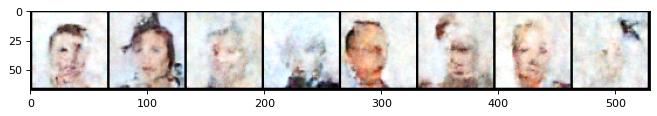

epoch: 1


100%|██████████| 3166/3166 [03:43<00:00, 14.16it/s, LR=0.0002, MSE=0.0196] 


Random Seed:  999


100%|██████████| 999/999 [00:06<00:00, 165.98it/s]


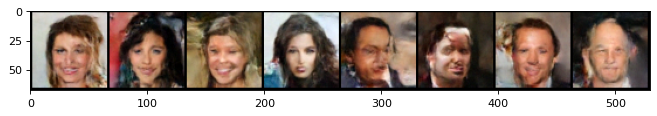

epoch: 2


100%|██████████| 3166/3166 [03:43<00:00, 14.16it/s, LR=0.0002, MSE=0.0183] 


Random Seed:  999


100%|██████████| 999/999 [00:06<00:00, 163.68it/s]


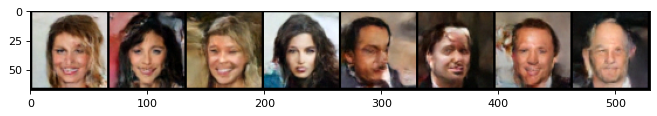

epoch: 3


100%|██████████| 3166/3166 [03:44<00:00, 14.13it/s, LR=0.0002, MSE=0.0173] 


Random Seed:  999


100%|██████████| 999/999 [00:05<00:00, 166.97it/s]


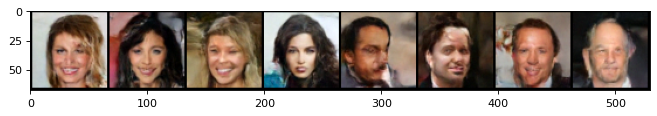

epoch: 4


100%|██████████| 3166/3166 [03:43<00:00, 14.15it/s, LR=0.0002, MSE=0.0167] 


Random Seed:  999


100%|██████████| 999/999 [00:06<00:00, 164.98it/s]


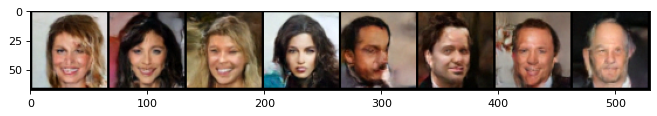

epoch: 5


100%|██████████| 3166/3166 [03:42<00:00, 14.21it/s, LR=0.0002, MSE=0.0164] 


Random Seed:  999


100%|██████████| 999/999 [00:05<00:00, 166.74it/s]


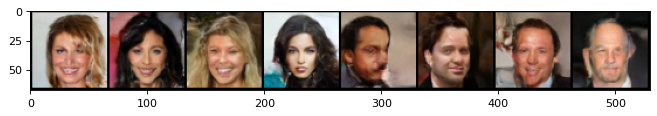

epoch: 6


100%|██████████| 3166/3166 [03:43<00:00, 14.17it/s, LR=0.0002, MSE=0.0158] 


Random Seed:  999


100%|██████████| 999/999 [00:06<00:00, 164.91it/s]


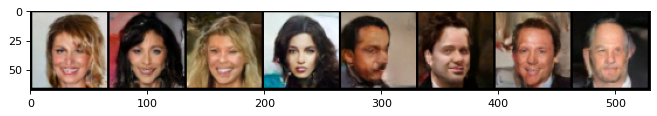

epoch: 7


100%|██████████| 3166/3166 [03:42<00:00, 14.20it/s, LR=0.0002, MSE=0.0154] 


Random Seed:  999


100%|██████████| 999/999 [00:06<00:00, 166.12it/s]


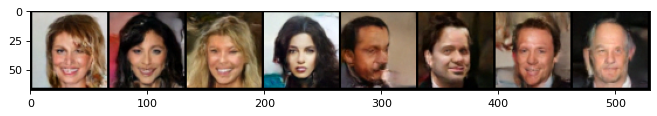

epoch: 8


100%|██████████| 3166/3166 [03:43<00:00, 14.18it/s, LR=0.0002, MSE=0.0151] 


Random Seed:  999


100%|██████████| 999/999 [00:06<00:00, 165.55it/s]


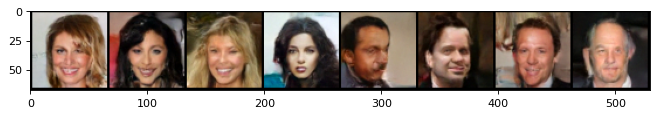

epoch: 9


100%|██████████| 3166/3166 [03:43<00:00, 14.18it/s, LR=0.0002, MSE=0.0149] 


Random Seed:  999


100%|██████████| 999/999 [00:06<00:00, 165.82it/s]


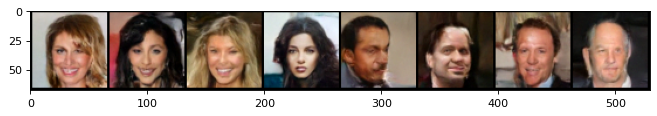

In [17]:
# Instantiate denoising autoencoder
model = UNet().to(device)

# ema_model is the averaged model that we'll use for sampling
ema_model = deepcopy(model)

# ema is the helper for updaing EMA weights
ema = EMA()

# Dataloader
trainloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=8)

# Mixed precision floating point arithmetic can speed up training on some GPUs
scaler = torch.cuda.amp.GradScaler()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Diffusion wrapper
diffusion = Diffusion(img_size=image_size, device=device)

num_epoch = 10
for epoch in range(num_epoch):
    print('epoch:', epoch)
    pbar = tqdm(trainloader)
    for images, y in pbar:
        y = y[:,gender_index].view(-1).cuda()

        with torch.cuda.amp.autocast(enabled=True):
            images = images.to(device)

            ################## YOUR CODE HERE ##################
            # sample a batch of random integers uniformly
            # from interval [1, diffusion.num_timesteps)
            ####################################################
            t = torch.randint(low=1, high=diffusion.num_timesteps, size=(images.shape[0],)).to(device)

            x_t, noise = diffusion.get_noisy_image(images, t)
            predicted_noise = model(x_t, t, y)

            ################## YOUR CODE HERE ##################
            # Use the mean squared error loss to optimize the predicted_noise
            # towards the true noise.
            ####################################################
            criterion = nn.MSELoss()
            loss = criterion(noise, predicted_noise)
            

        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        pbar.set_postfix(MSE=loss.item(), LR=optimizer.param_groups[0]['lr'])

        # update EMA model. First epoch of training is too noisy,
        # so we only do this after the first epoch
        if epoch > 0:
            ema.step_ema(ema_model, model)

    if epoch == 0:
        ema_model = deepcopy(model)

    set_random_seed() # set random seed to generate the same style face. This is handy for comparing across epochs.
    # n is number of images you want to generate
    sampled_images = diffusion.sample(ema_model, n=8, y=torch.tensor([0,0,0,0,1,1,1,1]).cuda())
    show_images(sampled_images)

Here we attach sample images after 1-epoch and 2-epoch training. If the quality of your generated samples are similar to these, then you are on the right track.

epoch 0:

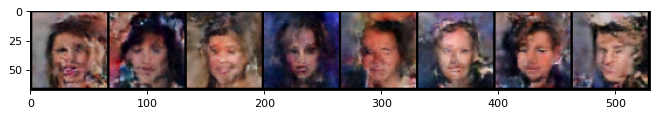

epoch 1:

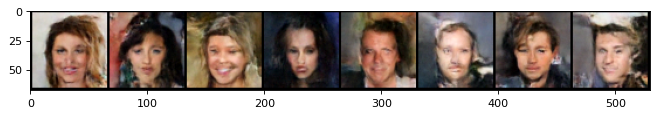

Generate a grid of 64 faces (half male and half female).

In [ ]:
set_random_seed()
y_gender = torch.cat((torch.zeros(32, dtype=torch.long), torch.ones(32, dtype=torch.long)))
sampled_images = diffusion.sample(ema_model, n=64, y=y_gender.cuda())
show_images(sampled_images)

Random Seed:  999


100%|██████████| 999/999 [00:32<00:00, 30.59it/s]


In [19]:
# # This is how you save the models, in case you need to take a break
# torch.save((ema_model.state_dict(), model.state_dict()), 'gender_conditional.pt')

# This is how you load the models
ema_model_state_dict, model_state_dict = torch.load('gender_conditional.pt')
ema_model.load_state_dict(ema_model_state_dict)
model.load_state_dict(model_state_dict)

<All keys matched successfully>

# Problem 3 Classifier Guided Generation (10 points + 20 points bonus)
------------------------

In the previous problem, you implmented a conditional diffusion model that generated faces based on some binary conditioning that was passed to the model as an argument.

In this problem, you will implement the conditioning in a different way. The diffusion model will be trained on _unlabeled data_ (i.e. the diffusion model is only trained to generate faces unconditionally). We then train a classifier on desired attributes and use this classifier's gradient to "guide" the diffusion process.

**This method of "guided" conditioning is useful, because we can generate images conditioned upon attributes which the diffusion model was not explicitly trained on.**

Here is some math to make this clearer:

In the unconditional setting, we train a denoising autoencoder $\epsilon_{\theta}(x_t, t)$. During the generation process, for timesteps from $t=T$ to $t=1$, we draw a sample from the Gaussian distribution $p_{\theta}(x_{t-1} | x_t)$, defined in the following way:

$$ \mu_{\theta}(x_t, t) = \frac{1}{\sqrt{\alpha_t}}\left( x_t - \frac{\beta_t}{\sqrt{ 1- \bar{\alpha_t} }}\epsilon_{\theta}(x_t, t)\right) $$

$$p_{\theta}(x_{t-1} | x_t) \sim \mathcal{N}(x_{t-1} ; \mu_{\theta} ( x_t, t), \beta_t \mathbf{I})$$

The resulting synthetic data drawn from $p_{\theta}(x_0)$ closely approximates the real data distribution $q(x_0)$.

After training $\epsilon_{\theta}(x_t, t)$, suppose we want to draw samples from the distribution $p_{\theta}(x_0 | y)$ for some attribute $y$ instead of the unconditional distribution $p_{\theta}(x_0)$. We have a classifier that gives us the probaability of $y$ given an image $x_t$: $p(y | x_t)$. What do we do? You will answer this in part (a).

_Note_: For ease of notation, we can include the classifier parameters in $\theta$. This way we don't need to keep track of two symbols for parameters. Just rememeber that $p_{\theta}(y | x_t)$ is given by the classifier, and $p_{\theta}(x_{t-1} | x_t)$ is given by the diffusion model.

## Problem 3(a) Conditional Reverse Process (10 points)
-------------------------

Remember that $p_{\theta}(x_T)$ is just random Gaussian noise, and it does not depend on $y$. This is nice, because we only need to worry about deriving the formula for $p_{\theta}(x_{t-1} | x_t, y)$. Let's call this the conditional reverse process. In this part you will complete the derivation for $p_{\theta}(x_{t-1} | x_t, y)$. You only need to show the first part, and the rest is given to you.

Show that:

$$p_{\theta}(x_{t-1} | x_t, y)  = \frac{p_{\theta}(x_{t-1} | x_t) p_{\theta}(y | x_{t-1})}{p_{\theta}(y | x_t) }$$

Assume that $p_{\theta}(x_t | x_{t-1} , y) = p_{\theta}(x_t | x_{t-1})$ (i.e. the forward process is not conditioned on $y$).

Hint: First show that $p_{\theta}(y | x_{t-1}, x_t) = p_{\theta} (y | x_{t-1})$.

### Solution

SOLUTION HERE

### Completing the derivation (read this)

Take $\log$ of both sides (We will use $C_1$, $C_2$, and $C_3$ to denote constants that don't depend on $\mu_{\theta}$):

$$\log p_{\theta} (x_{t-1} | x_t, y) = \log p_{\theta} (x_{t-1} | x_t) + \log p_{\theta} (y | x_{t-1}) + C_2$$

Apply the formula for the PDF of a multivariate Gaussian to the definition of $p_{\theta}$:

$$\log p_{\theta} (x_{t-1} | x_t) = -\frac{1}{2} \| x_{t-1} - \mu_{\theta}\|^2 \frac{1}{\beta_t} + C_1$$

Calculate the fist-order taylor expansion of $\log p_{\theta} (y | x_{t-1})$ around $x_{t-1} = \mu_{\theta}$:

\begin{split}
\log p_{\theta} (y | x_{t-1}) &\approx \log p_{\theta} (y | \mu_{\theta}) + \langle (x_{t-1} - \mu_{\theta}) , \nabla_{x_{t-1}} \log p_{\theta} (y | x_{t-1})  |_{x_{t-1} = \mu_{\theta}} \rangle
\\
&= \langle x_{t-1} - \mu_{\theta} , g \rangle + C_3
\end{split}

where we use $g$ to denote $g = \nabla_{x_{t-1}} \log p_{\theta} (y | x_{t-1})  |_{x_{t-1} = \mu_{\theta}}$.

Combining the last three equations, we get:

\begin{split}
\log p_{\theta} (x_{t-1} | x_t, y) &= \log p_{\theta} (x_{t-1} | x_t) + \log p_{\theta} (y | x_{t-1}) + C_2
\\
&\approx -\frac{1}{2} \| x_{t-1} - \mu_{\theta}\|^2 \frac{1}{\beta_t} + \langle x_{t-1} - \mu_{\theta} , g \rangle + C_1 + C_2 + C_3
\\
&= -\frac{1}{2} \frac{1}{\beta_t} \left( \| x_{t-1} - \mu_{\theta}\|^2 - 2 \langle x_{t-1} - \mu_{\theta} , \beta_t g \rangle + \|\beta_t g \|^2 \right) + \frac{1}{2} \beta_t \|g\|^2 + C_1 + C_2 + C_3
\\
&= -\frac{1}{2} \frac{1}{\beta_t} \| x_{t-1} - \mu_{\theta} - \beta_t g\|^2  + \text{constants that don't depend on $\mu_{\theta}$}
\end{split}

This tells us how to shift the mean of the Gaussian distribution to account for the conditioning, namely:

$$p_{\theta}(x_{t-1} | x_t, y) \sim \mathcal{N}(x_{t-1} ; \mu_{\theta} ( x_t, t) + s\beta_t g, \beta_t \mathbf{I})$$

Note that we need to scale the gradient $g$ by some value $s$ for the implementation. $s$ is a hyperparameter.

For comparison, for unconditional generation, the reverse process was defined as:

$$p_{\theta}(x_{t-1} | x_t) \sim \mathcal{N}(x_{t-1} ; \mu_{\theta} ( x_t, t), \beta_t \mathbf{I})$$

## Problem 3(b) Training the Classifier (5 points bonus)
-------------------------------------
First, we need to train the classifier $p_{\theta}(y | x_t)$. This will give us the gradient $g$ we need to guide the diffusion process. In this problem, you will pick two attributes to train a classifier on, so when you generate your face samples, you can condition on two attributes simultaneously.

You can pick two attributes from: gender, blond hair, glasses, young, and smiling.

We provide you with the classifier code:

In [20]:
class Classifier(nn.Module):
    ''' UNet implementation of a denoising auto-encoder.'''
    def __init__(self, c_in=3, c_out=3, conditional=True, emb_dim=256):
        '''
        c_in: Number of image channels in input.
        c_out: Number of image channels in output.
        emb_dim: Length of conditional embedding vector.
        '''
        super().__init__()
        self.emb_dim = emb_dim
        self.inc = Block(c_in, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 256)
        self.bot1 = Block(256, 512)
        self.linear = nn.Linear(512, 2)

    def temporal_encoding(self, timestep):
        '''
        This implements the sinusoidal temporal encoding for the current timestep.
        Input timestep is a tensor of length equal to the batch size
        Output emb is a 2D tensor B x V,
            where V is the embedding dimension.
        '''
        assert len(timestep.shape) == 1
        half_dim = self.emb_dim // 2
        emb = math.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, dtype=torch.float32) * -emb)
        emb = emb.to(device=timestep.device)
        emb = timestep.float()[:, None] * emb[None, :]
        emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)
        if self.emb_dim % 2 == 1:  # zero pad
            emb = torch.nn.functional.pad(emb, (0,1,0,0))
        return emb

    def unet_forward(self, x, t):
        # x: B x 3 x 224 x 224
        x1 = self.inc(x, t)    # x1: B x 64 x 64 x 64
        x2 = self.down1(x1, t) # x2: B x 128 x 32 x 32
        x3 = self.down2(x2, t) # x3: B x 256 x 16 x 16
        x4 = self.down3(x3, t) # x4: B x 256 x 8 x 8
        x4 = self.bot1(x4, t) # x4: B x 512 x 8 x 8

        # max-pooling then linear layer
        output = self.linear(x4.max(dim=-1).values.max(dim=-1).values)

        return output

    def forward(self, x, t, y=None):
        '''
        x: image input
        t: integer timestep
        y: binary conditioning
        Return denoised image conditioned on the timestep t and
            class label y.
        '''
        c = self.temporal_encoding(t)
        return self.unet_forward(x, c)

The classifier outputs two numbers for each image, one number per binary attribute. Use a sigmoid to normalize the outputs. This will give you the probability $p_{\theta} (y=1|x_t)$.

The next code block implements the training loop. You will need to fill in the loss function that trains the classifier. Use the binary cross entropy loss. The classifier is stored in the variable called "guide".

In [21]:
# Hyperparameters
batch_size = 64
learning_rate = 0.0001
weight_decay = 0.00001 # (L2 penalty)

# Make the dataset
dataset = CelebADataset(transform=train_transform)

# Indices of possible binary attributes to choose from
gender_index = attributes.index('Male')
blond_index = attributes.index('Blond_Hair')
glasses_index = attributes.index('Eyeglasses')
young_index = attributes.index('Young')

# Instantiate the classifier
guide = Classifier().to(device)

# Dataloader
trainloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=8)

# Mixed precision floating point arithmetic can speed up training on some GPUs
scaler = torch.cuda.amp.GradScaler()
optimizer = optim.AdamW(guide.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Diffusion wrapper
diffusion = Diffusion(img_size=image_size, device=device)
loss_list = []

for epoch in range(5):
    pbar = tqdm(trainloader)
    for images, y in pbar:
        ############# OPTIONALLY MODIFY THIS ###############
        # You can choose whichever two attributes you want.
        # We used gender and glasses for the solutions.
        # gender and hair color also work well.
        y = y[:,(gender_index, glasses_index)].cuda().view(-1)
        ####################################################

        images = images.to(device)

        ################## YOUR CODE HERE ##################
        # sample a batch of random integers uniformly
        # from interval [1, diffusion.num_timesteps)
        ####################################################
        t = torch.randint(low=1, high=diffusion.num_timesteps, size=(images.shape[0],))
        t = t.to(device)

        x_t, noise = diffusion.get_noisy_image(images, t)

        with torch.cuda.amp.autocast(enabled=True):
            out = guide(x_t, t).view(-1)

        ################## YOUR CODE HERE ##################
        # Fill in the loss function here. Use the binary cross entropy loss.
        # y is binary ground truth.
        # out is the un-normalized prediction.
        # Both "y" and "out" have dimension B x 2,
        # where B is the batch size.
        ####################################################
        # Use sigmoid to normalize the outputs
        input = out.float()
        target = y.float()
        loss = F.binary_cross_entropy(torch.sigmoid(input), target)

        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        pbar.set_postfix(MSE=loss.item(), LR=optimizer.param_groups[0]['lr'])
        loss_list.append(loss.item())

# The classifier you need to use for guidance is now stored in "guide"

100%|██████████| 3166/3166 [01:07<00:00, 46.98it/s, LR=0.0001, MSE=0.406]


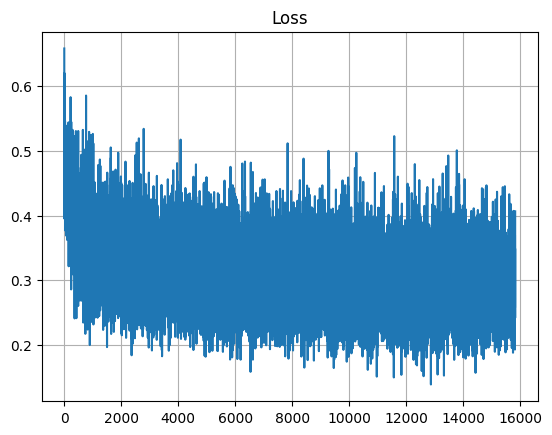

In [22]:
plt.plot(loss_list)
plt.title('Loss')
plt.grid()
plt.show()

## Problem 3(c) Implementing Guided Diffusion (10 points bonus)
------------------------

Now modify "GuidedDiffusion.sample" in the code below to perform guided diffusion.

You should copy the code you wrote in Problem 2(b) for "Diffusion.sample" and make the necessary adjustments for guided diffusion.

Remember that the unguided diffusion draws samples from:

$$p_{\theta}(x_{t-1} | x_t) \sim \mathcal{N}(x_{t-1} ; \mu_{\theta} ( x_t, t), \beta_t \mathbf{I})$$

The guided diffusion draws samples from:

$$p_{\theta}(x_{t-1} | x_t, y) \sim \mathcal{N}(x_{t-1} ; \mu_{\theta} ( x_t, t) + s\beta_t g, \beta_t \mathbf{I})$$

$s$ is a scaling hyperparameter you will have to tune. $g$ is the gradient define as:

$$g = \nabla_{x_{t-1}} \log p_{\theta} (y | x_{t-1})  |_{x_{t-1} = \mu_{\theta}}$$

Where $p_{\theta} (y | x_{t-1})$ is the classifier you trained in the previous code block.

_Hint:_ Inside the sampling loop, you will need to set "requires_grad=True" on the image $x_{t-1}$, calculate the log likelihood using the guidance classifier, call backward(), then access the gradients of the image using the ".grad" attribute. This process is similar to optimization during training, except now the image is the parameter being optimized.

_Hint:_ Make sure you get your signs correct. Remember, you are "pushing" the image in the direction that maximizes the probability of the label given the image.

In [42]:
class GuidedDiffusion:
    '''
    Implements the Guided Diffusion process,
    including both training and sampling.
    You should first copy and paste the Diffusion code
    you wrote for Problem 2(b) and work from there.
    '''
    def __init__(self, num_timesteps=1000, beta_start=1e-4, beta_end=0.02, img_size=64, device="cuda"):
        self.num_timesteps = num_timesteps
        self.beta_start = beta_start
        self.beta_end = beta_end
        self.img_size = img_size
        self.device = device

        ################## YOUR CODE HERE ##################
        # SAME AS PROBLEM 2(b)
        ####################################################
        # From above: beta increases linearly wrt t, beta = {beta_1...beta_T}
        self.beta = torch.linspace(self.beta_start, self.beta_end, self.num_timesteps)
        self.beta = self.beta.to(self.device)
        
        # From above: alpha = 1 - beta
        self.alpha = 1 - self.beta
        
        # From above: alpha_hat = products of all alpha values
        self.alpha_hat = torch.cumprod(self.alpha, dim=0)


    def sample(self, model, n, y=None, guide=None, scale=1.):
        '''
        This function is used  to generate images.

        model: The denoising auto-encoder \epsilon_{\theta} (unconditional)
        n: The number of images you want to generate
        y: A 2D binary vector of shape n x 2. 2 is the number of
           attributes for conditioning.
        guide: The guidance classifier you trained.
        scale: $s$ in the equation. How much to scale the guidance
               gradient.
        '''
        model.eval()
        ################## YOUR CODE HERE ##################
        # Write code for the guided sampling process here.
        # You should start from the unguided sampling code from problem 2(b)
        # and make the necessary edits.
        #
        # Inside the for loop you wrote, look for where you calculate \mu_{\theta}
        # and where you add the Gaussian noise with variance \beta_t
        # Now, in addition to adding the Gaussian noise, add scale * g,
        # where g is the gradient defined in the assignment.
        ####################################################
        # x from the standard normal distribution
        x = torch.empty((n, 3, self.img_size, self.img_size), device=self.device).normal_()
            
        # for t=1000->1
        for i in tqdm(range(self.num_timesteps - 1, 0, -1), position=0):
            with torch.no_grad():
                t = (torch.ones(n) * i).long()
                t = t.to(self.device)

                # epsilon_theta(x_t, t)
                epsilon_theta = model(x, t, y)

                # Do not add noise to the final product
                z = torch.randn_like(x) if i > 1 else torch.zeros_like(x)

            alpha_hat = self.alpha_hat[t][:, None, None, None]
            alpha = self.alpha[t][:, None, None, None]
            beta = self.beta[t][:, None, None, None]
            x_t_minus_one = x - (1 - alpha)/(torch.sqrt(1 - alpha_hat)) * epsilon_theta
            
            if i > 1:
                # Set requires_grad to 'True'
                x_t_minus_one = x_t_minus_one.detach()  # to avoid leaf error
                x_t_minus_one.requires_grad = True
                
                # Calculate the log-likelood using the classfier 'guide' (from above)
                input = guide(x_t_minus_one, t).reshape(-1).float()
                target = y.reshape(-1).float()
                loss = F.binary_cross_entropy(torch.sigmoid(input), target)
                
                # Call backward
                loss.backward()

                # Update with scale, gradient, and noise
                # Access the gradients using .grad
                g = x_t_minus_one.grad
                
                # The guided diffusion draws samples from (from problem instruction)
                variance = torch.sqrt(beta)
                x = (1/torch.sqrt(alpha)) * x_t_minus_one + (scale * torch.sqrt(beta) * g) + variance * z
            else:
                # This is same as 2(b)
                variance = torch.sqrt(beta)
                x = (1/torch.sqrt(alpha)) * x_t_minus_one + variance * z

        model.train()
        x = (x.clamp(-1, 1) + 1) / 2
        x = (x * 255).type(torch.uint8)
        return x

def show_images(images, **kwargs):
    plt.figure(figsize=(10, 10), dpi=80)
    grid = torchvision.utils.make_grid(images, **kwargs)
    ndarr = grid.permute(1, 2, 0).to('cpu').numpy()
    im = Image.fromarray(ndarr)
    plt.imshow(im)
    plt.show()

## Problem 3(d) Generate Guided Samples (5 points bonus)
-----------------------------------------

You are finally ready to generate the guided samples. For this problem, we trained an unconditional diffusion model for you. You should load this model from the indicated file and use the guided diffusion function you just wrote to generate condioned samples. Specifically, you need to generate 64 faces:

* 16 faces with attribute1=0, attribute2=0
* 16 faces with attribute1=1, attribute2=0
* 16 faces with attribute1=0, attribute2=1
* 16 faces with attribute1=1, attribute2=1

_Note_: Generating 64 faces might take too much memory, depending on your implementation. In this case, it is ok to split the 64 faces into smaller batches.

You must use the provided unconditional diffusion model with the classifier guidance mechanism, download it [here](https://drive.google.com/file/d/1WZziistMmnbEnM4Jw9MNiU69DUFFP3ZG/view?usp=sharing)

You should tune the guidance scale ('scale' in the code, $s$ in the math). **The guidance scale tradesoff diversity with fidelity.** If $s$ is too small, not only will the images not align with your conditioning, they will also not look as nice. However, there will be good diversity. If $s$ is too high, the images might look more real and perfectly align with your conditioning, but they will lack diversity (all images look generic).


In [43]:
### Load the checkpoint for unconditional diffusion model
uc_model_path = '/projectnb/ec523kb/students/kontact/unconditional_model.pt'

unconditional_model = UNet(conditional=False).cuda()
ema_model_state_dict, _ = torch.load(uc_model_path)
unconditional_model.load_state_dict(ema_model_state_dict)

<All keys matched successfully>

Random Seed:  999


100%|██████████| 999/999 [00:56<00:00, 17.73it/s]


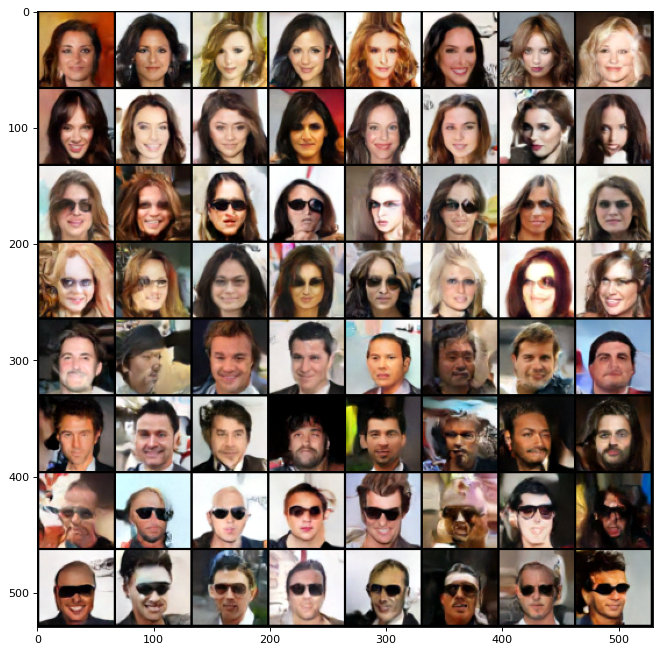

In [44]:
# Instantiate guided diffusion object
diffusion = GuidedDiffusion(img_size=image_size, device=device)
set_random_seed()

# Generate conditioning
yy = []
for i1 in [0,1]:
    for i2 in [0,1]:
        for _ in range(64 // 4):
            yy.append([i1, i2])
conditionings = torch.tensor(yy).cuda()

sampled_images = diffusion.sample(unconditional_model, n=64, y=conditionings, guide=guide, scale=200.) # tune this
show_images(sampled_images)